Accuracy for review sentiment analysis: 0.7635627530364373


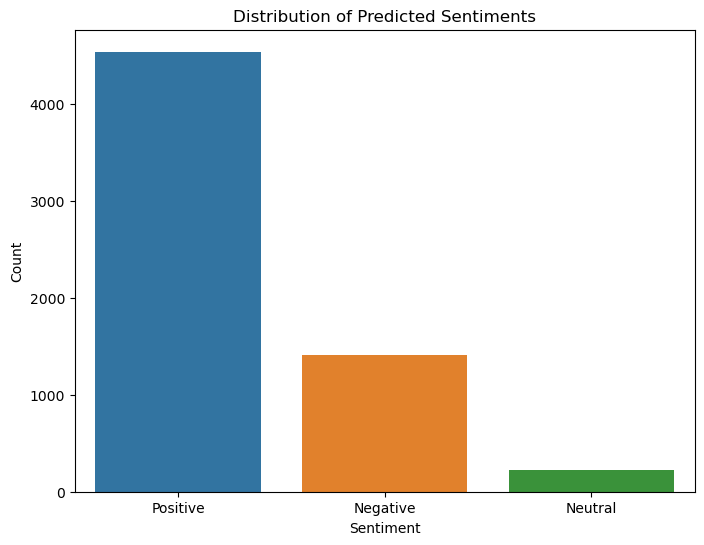

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Database Data - Amazon Reviews.csv')

# Handling missing values
df['review_text'].fillna('', inplace=True)

# Preprocessing
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_text = tfidf_vectorizer.fit_transform(df['review_text'])
X_rating = df['rating'].values.reshape(-1, 1)
X = pd.concat([pd.DataFrame(X_text.toarray()), pd.DataFrame(X_rating)], axis=1)

# Define thresholds for positive, neutral, and negative ratings
positive_threshold = 4
negative_threshold = 2

# Convert 'rating' column to categorical based on thresholds
df['sentiment_id'] = pd.cut(df['rating'], bins=[-float('inf'), negative_threshold, positive_threshold, float('inf')],
                             labels=['Negative', 'Neutral', 'Positive'])

# Target variable
y_rating = df['sentiment_id']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_rating, test_size=0.2, random_state=42)

# Training the model for review sentiment analysis
classifier_review = LogisticRegression(max_iter=1000)
classifier_review.fit(X_train.iloc[:, :-1], y_train)

# Predicting sentiment for reviews in the test set
y_pred_review = classifier_review.predict(X_test.iloc[:, :-1])

# Accuracy score for review sentiment analysis
accuracy_review = accuracy_score(y_test, y_pred_review)
print(f"Accuracy for review sentiment analysis: {accuracy_review}")

# Predicting sentiment for reviews based on ratings
y_pred_rating = pd.cut(df['rating'], bins=[-float('inf'), negative_threshold, positive_threshold, float('inf')],
                        labels=['Negative', 'Neutral', 'Positive'])

# Creating a new DataFrame with predicted sentiment from ratings and reviews
df['predicted_sentiment_rating'] = y_pred_rating
df['predicted_sentiment_review'] = classifier_review.predict(X.iloc[:, :-1])
df['overall_sentiment_analysis'] = df.apply(lambda row: row['predicted_sentiment_review']
                                            if row['predicted_sentiment_review'] != 'Neutral'
                                            else row['predicted_sentiment_rating'], axis=1)

# Visualizing the distribution of predicted sentiments
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='overall_sentiment_analysis')
plt.title('Distribution of Predicted Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Saving the updated DataFrame to a new CSV file
df.to_csv('Updated_Amazon_Reviews.csv', index=False)
